<a href="https://colab.research.google.com/github/prakash8096/AdminDashboard/blob/master/Facebook_friend_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
cd ..

/content/drive/My Drive/Facebook-20210205T040830Z-001/Facebook


In [ ]:
cd drive/MyDrive/Facebook-20210205T040830Z-001/Facebook

[Errno 2] No such file or directory: 'drive/MyDrive/Facebook-20210205T040830Z-001/Facebook'
/content/drive/My Drive/Facebook-20210205T040830Z-001/Facebook/data/after_eda


In [ ]:
ls data/fea_sample

hits.p  page_rank.p  storage_sample_stage1.h5  storage_sample_stage3.h5
katz.p  p_rank.p     storage_sample_stage2.h5  storage_sample_stage4.h5


In [ ]:
ls

data/         FB_featurization.ipynb  sample_sub_graph.pdf  woh_sample.csv
FB_EDA.ipynb  FB_Models.ipynb         woh_sample


In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train=df_final_train['indicator_link']
df_final_train.drop(['indicator_link'],axis=1,inplace=True)

y_test=df_final_test['indicator_link']

df_final_test.drop(['indicator_link'],axis=1,inplace=True)

In [ ]:
df_final_test.columns

Index(['source_node', 'destination_node', 'jaccard_followers',
       'jaccard_followees', 'cosine_followers', 'cosine_followees',
       'num_followers_s', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'weight_in', 'weight_out', 'weight_f1',
       'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
df_final_train

In [ ]:
nodes=df_final_train[['source_node','destination_node']].values

In [ ]:
test_nodes=df_final_test[['source_node','destination_node']].values

In [ ]:
import networkx as nx

In [ ]:
train_graph=nx.DiGraph()

In [ ]:
train_graph.add_edges_from(nodes)

In [ ]:
preferential_list=[]
for each in nodes:
  p=train_graph.out_degree(each[0])*train_graph.out_degree(each[1])
  preferential_list.append(p)


In [ ]:
test_graph=nx.DiGraph()
test_graph.add_edges_from(test_nodes)

preferential_test_list=[]
for each in test_nodes:
  p=test_graph.out_degree(each[0])*test_graph.out_degree(each[1])
  preferential_test_list.append(p)


In [ ]:
len(preferential_test_list)

50002

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'jaccard_followers',
       'jaccard_followees', 'cosine_followers', 'cosine_followees',
       'num_followers_s', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'weight_in', 'weight_out', 'weight_f1',
       'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
#calculating svd_dot


svd_u_s=df_final_train[['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4','svd_u_s_5', 'svd_u_s_6']].values
svd_u_d=df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6']].values

svd_v_s=df_final_train[['svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']].values

svd_v_d=df_final_train[[ 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6']].values

In [ ]:
svd_u_d.shape

(100002, 6)

In [ ]:
svd_u_dot=[]

for s,d in zip(svd_u_s,svd_u_d):
  svd_u_dot.append(np.dot(s,d))


svd_v_dot=[]


for s,d in zip(svd_v_s,svd_v_d):
  svd_v_dot.append(np.dot(s,d))



In [ ]:
len(svd_u_dot)

100002

In [ ]:
svd_u_dot

svd_dot for The test_data

In [ ]:
#calculating svd_dot


svd_u_s_test=df_final_test[['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4','svd_u_s_5', 'svd_u_s_6']].values
svd_u_d_test=df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6']].values

svd_v_s_test=df_final_test[['svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']].values

svd_v_d_test=df_final_test[[ 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6']].values

In [ ]:
svd_u_dot_test=[]

for s,d in zip(svd_u_s_test,svd_u_d_test):
  svd_u_dot_test.append(np.dot(s,d))


svd_v_dot_test=[]


for s,d in zip(svd_v_s_test,svd_v_d_test):
  svd_v_dot_test.append(np.dot(s,d))



In [ ]:
len(svd_u_dot)

100002

In [ ]:
d={
    'preferential_attachment':preferential_list,
   'svd_u_dot':svd_u_dot,
   'svd_v_dot':svd_v_dot
}

In [ ]:
train_extra=pd.DataFrame(data=d)

In [ ]:
d={
    'preferential_attachment':preferential_test_list,
   'svd_u_dot':svd_u_dot_test,
   'svd_v_dot':svd_v_dot_test
}

In [ ]:
test_extra=pd.DataFrame(data=d)

In [ ]:
test_extra.columns

Index(['preferential_attachment', 'svd_u_dot', 'svd_v_dot'], dtype='object')

In [ ]:
final_train=pd.concat([df_final_train,train_extra],axis=1)
final_test=pd.concat([df_final_test,test_extra],axis=1)

In [ ]:
final_train.columns

Index(['source_node', 'destination_node', 'jaccard_followers',
       'jaccard_followees', 'cosine_followers', 'cosine_followees',
       'num_followers_s', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'weight_in', 'weight_out', 'weight_f1',
       'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment', 'svd_u_dot', 'svd_v_dot'],
      dtype='object')

In [ ]:
final_train.drop(['source_node', 'destination_node'],axis=1,inplace=True)
final_test.drop(['source_node', 'destination_node'],axis=1,inplace=True)

In [ ]:
final_train.shape

(100002, 54)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#definig the parameters

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] 

max_depth=range(3,10,2)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:

train_scores = []
test_scores = []
for i in learning_rate:

  for d in max_depth:


    clf=XGBClassifier(learning_rate=i,max_depth=d)
    
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)


In [ ]:
train_scores=np.array(train_scores).reshape(6,4)

Text(33.0, 0.5, 'Learning Rate')

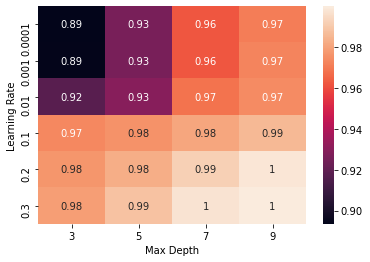

In [ ]:
sns.heatmap(train_scores,xticklabels=max_depth,yticklabels=learning_rate,annot=True)
plt.xlabel("Max Depth")
plt.ylabel("Learning Rate")

In [ ]:
test_scores=np.array(test_scores).reshape(6,4)

Text(33.0, 0.5, 'Learning Rate')

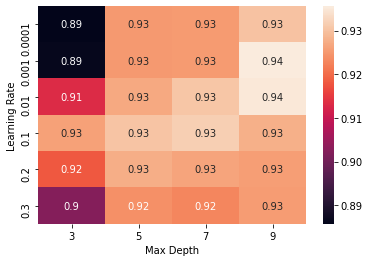

In [ ]:
data=sns.heatmap(test_scores,xticklabels=max_depth,yticklabels=learning_rate,annot=True)
plt.xlabel("Max Depth")
plt.ylabel("Learning Rate")

In [ ]:
g_model=XGBClassifier(max_depth=9,learning_rate=0.01)

g_model.fit(final_train ,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
test_predict=g_model.predict(final_test)

#print('Mean Test score',g_model.cv_results_['mean_test_score'])
# print('Mean Train score',g_model.cv_results_[''])
print(accuracy_score(y_test,test_predict))

0.9385424583016679


In [ ]:
train_predict=g_model.predict(final_train)

In [ ]:
print(accuracy_score(y_test,test_predict))

0.9385424583016679


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


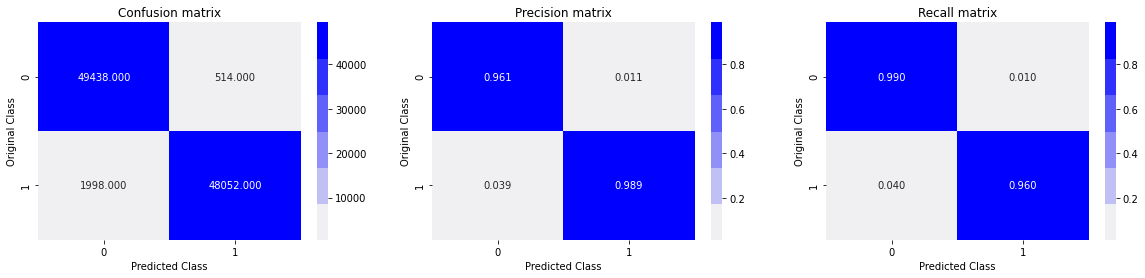

Test confusion_matrix


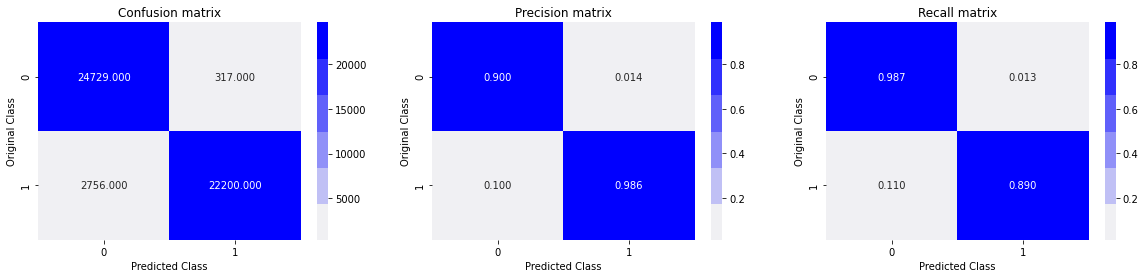

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,train_predict)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,test_predict)